#  MSCA 37011 - Deep Learning and Image Recognition
## Assignment- Sine function using Neural Networks
## Duo Zhou

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets,metrics
%matplotlib inline 

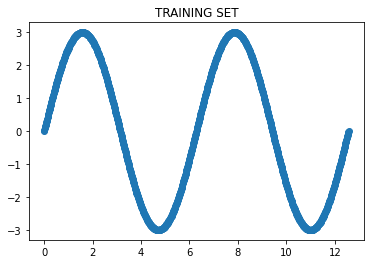

In [2]:
#Generate Sine input and output data
N = 1000 # number of data points
X = np.linspace(0, 4*np.pi, N, dtype=np.float32)
Y = 3.0*np.sin(X+0.001)
plt.title('TRAINING SET')
plt.scatter(X,Y)
plt.show()

In [3]:
#reshape the input data to a 2D array
print (X.shape, Y.shape)
X = np.reshape(X, (1000,1))
print (X.shape, Y.shape)

(1000,) (1000,)
(1000, 1) (1000,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(900, 1) (900,)
(100, 1) (100,)


### ANN using Keras

## <span style="color:cornflowerblue">Exercise:</span>

Create a 3 layered NN that learns the Sine function

Hint: 
1. Set a very small learning rate and weight decay
2. Use activations: "Sigmoid", "Tanh", "Linear" in the three layers
3. Which error function should you use ?

Keras layers activation https://keras.io/activations/

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [15]:
# Define the neural network
np.random.seed(100)
model = Sequential()

model.add(Dense(5, activation='sigmoid',input_dim=1))
model.add(Dense(5, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='linear'))



In [16]:

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.7, nesterov=True)

#Configure the model for training
model.compile(loss='mean_squared_error', optimizer=sgd)
# Train the neural network
#Train the model
model.fit(X_train, y_train, epochs=350, batch_size=1)

Epoch 1/350
900/900 [==============================] - 1s 1ms/step - loss: 4.3036
Epoch 2/350
900/900 [==============================] - 1s 888us/step - loss: 3.6713
Epoch 3/350
900/900 [==============================] - 1s 994us/step - loss: 3.4549
Epoch 4/350
900/900 [==============================] - 1s 885us/step - loss: 3.3163
Epoch 5/350
900/900 [==============================] - 1s 872us/step - loss: 3.2403
Epoch 6/350
900/900 [==============================] - 1s 1ms/step - loss: 3.1862
Epoch 7/350
900/900 [==============================] - 1s 905us/step - loss: 3.1148
Epoch 8/350
900/900 [==============================] - 1s 940us/step - loss: 3.0627
Epoch 9/350
900/900 [==============================] - 1s 912us/step - loss: 2.9659
Epoch 10/350
900/900 [==============================] - 1s 2ms/step - loss: 2.8759
Epoch 11/350
900/900 [==============================] - 1s 1ms/step - loss: 2.7430
Epoch 12/350
900/900 [==============================] - 1s 1ms/step - loss: 2.5961

900/900 [==============================] - 1s 1ms/step - loss: 2.3501
Epoch 195/350
900/900 [==============================] - 1s 985us/step - loss: 2.3448
Epoch 196/350
900/900 [==============================] - 1s 966us/step - loss: 2.3394
Epoch 197/350
900/900 [==============================] - 1s 971us/step - loss: 2.3542
Epoch 198/350
900/900 [==============================] - 1s 987us/step - loss: 2.3456
Epoch 199/350
900/900 [==============================] - 1s 968us/step - loss: 2.3525
Epoch 200/350
900/900 [==============================] - 1s 1ms/step - loss: 2.3393
Epoch 201/350
900/900 [==============================] - 1s 988us/step - loss: 2.3388
Epoch 202/350
900/900 [==============================] - 1s 978us/step - loss: 2.3374
Epoch 203/350
900/900 [==============================] - 1s 989us/step - loss: 2.3451
Epoch 204/350
900/900 [==============================] - 1s 992us/step - loss: 2.3311
Epoch 205/350
900/900 [==============================] - 1s 1ms/step - l

In [11]:
predicted=model.predict(X_test)

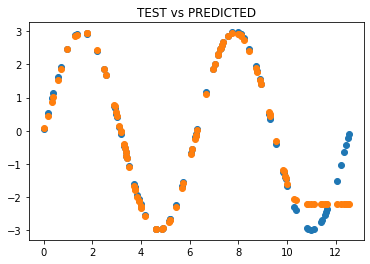

In [12]:
plt.title('TEST vs PREDICTED')
plt.scatter(X_test.ravel(),y_test)
plt.scatter(X_test.ravel(),predicted)
plt.show()